In [ ]:
# Draw a map of Sh and Sb sampling locations

In [1]:
import os
# import vcf
from pathlib import Path
from matplotlib import pyplot as plt
# from matplotlib import cm
import pandas as pd
from matplotlib.pyplot import figure
# import glob
import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines
# import statistics
# import allel
# from collections import defaultdict
# from itertools import combinations
# from haversine import haversine
# from skbio.stats.distance import mantel
# from scipy.stats import ttest_ind
# import random
# import time
# import multiprocessing as mp
from IPython.display import Image



# # from haversine import haversine
import cartopy.crs as ccrs
import cartopy.feature as cf
# from pykrige.ok import OrdinaryKriging


In [2]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)

os.chdir(proj_dir)

In [3]:
info_df=pd.read_csv("{}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv".format(proj_dir), sep=",") 

In [4]:
Path("{}/sampling_maps".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/sampling_maps".format(results_dir))

In [5]:
#these are samples that passed filtering...need to do after initial pca
pca_df=pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")

In [6]:
df = pca_df[["sample_name", "lat", "lon", "pca_species", "country"]]

In [7]:
sh_df = df.loc[df["pca_species"] == "s_haematobium"]
sb_df = df.loc[df["pca_species"] == "s_bovis"]

In [8]:
missing = set(sh_df[sh_df['lat'].isna()]["country"].unique())

In [9]:
present = set(sh_df[~sh_df['lat'].isna()]["country"].unique())

In [10]:
missing.difference(present)

{'cameroon',
 'egypt',
 'gambia',
 'guineabissau',
 'kenya',
 'liberia',
 'mali',
 'senegal'}

In [11]:
cameroon = [5.359846821839579, 12.83241583754397]
egypt = [26.79051859746806, 29.75135994720815]
gambia = [13.417174078240578, -15.468365084085413]
guineabissau = [12.217389596231383, -13.622661452252528]
kenya = [-0.0375919952015787, 35.50819643080273]
liberia = [6.3216131811123155, -8.65684105409062]
mali = [18.110125425188524, -2.108990737257369]
senegal = [14.525930151908192, -14.413677237868546]


In [12]:
sh_df

,sample_name,lat,lon,pca_species,country
9,Sh_NG_eb_6_2,6.328611,8.082222,s_haematobium,nigeria
10,Sh_NG_ed_1_3,NaN,NaN,s_haematobium,nigeria
11,Sh_NG_ed_3_2,NaN,NaN,s_haematobium,nigeria
12,Sh_NG_kb_2_1,11.710000,4.052222,s_haematobium,nigeria
13,Sh_NG_kw_1_10,8.892222,5.451389,s_haematobium,nigeria
...,...,...,...,...,...
166,ssp_niger_libore_167,13.390080,2.197110,s_haematobium,niger
167,ssp_niger_libore_168,13.390080,2.197110,s_haematobium,niger
168,ssp_niger_libore_169,13.404170,2.188020,s_haematobium,niger
169,ssp_niger_libore_173,13.404170,2.188020,s_haematobium,niger


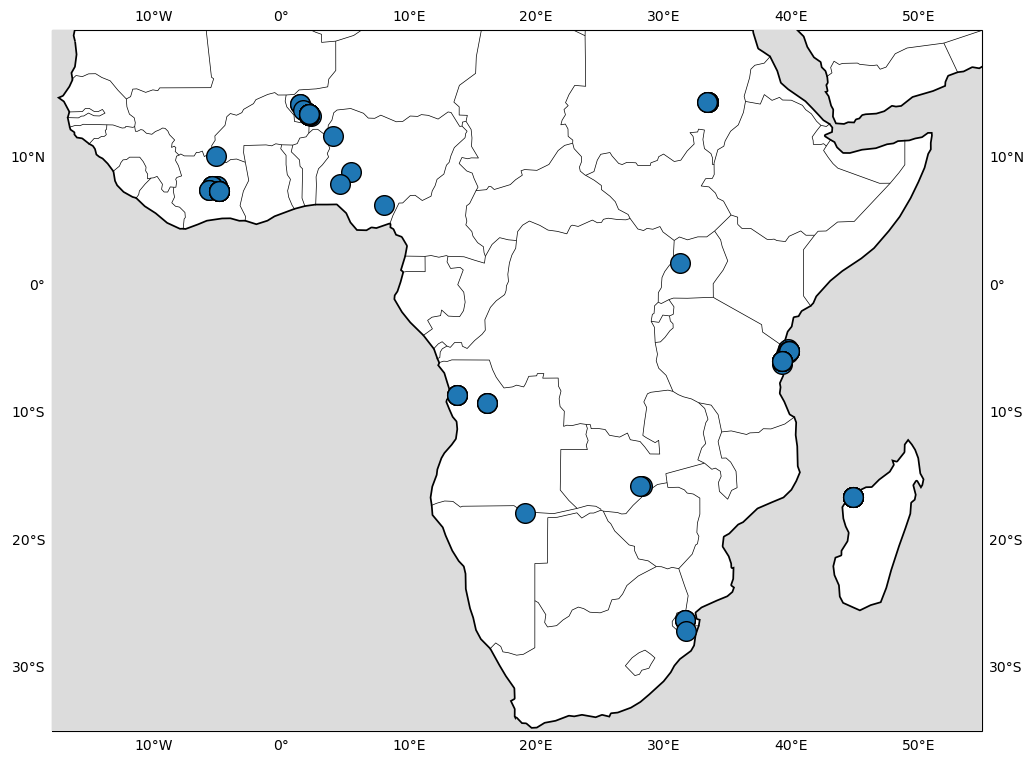

In [31]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(sh_df["lon"], sh_df["lat"], marker='o', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-18, 55])
plt.ylim([-35, 20])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sh_map.png', dpi=300)
plt.savefig('sh_map.svg')


plt.show()

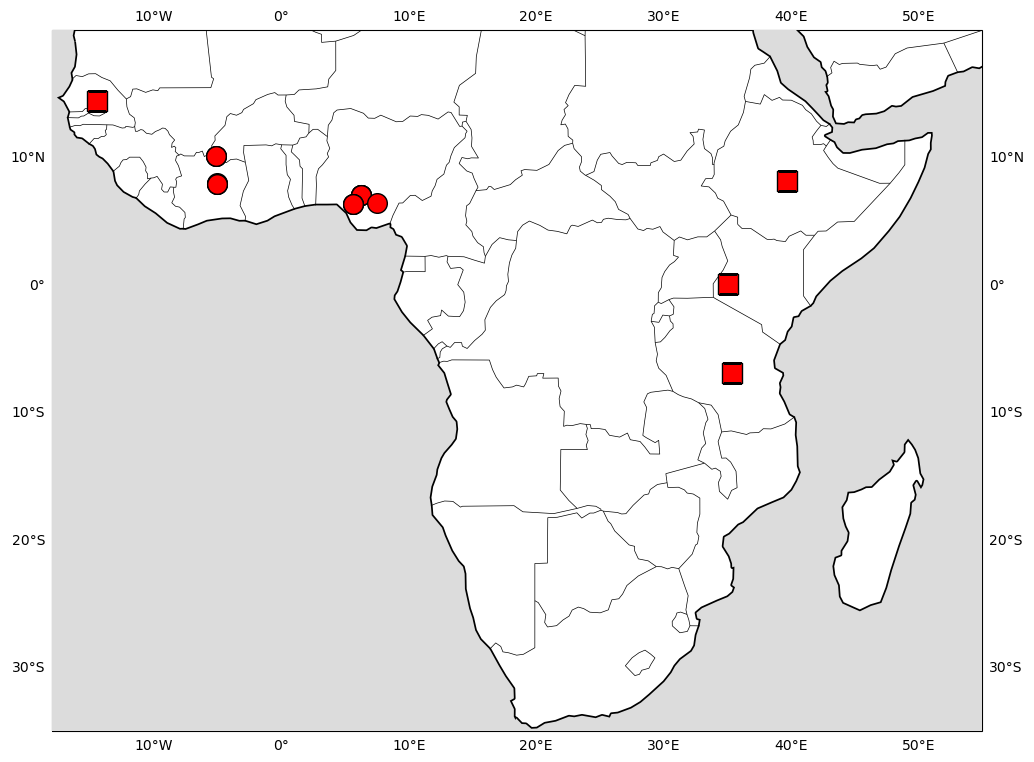

In [32]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(sb_df["lon"], sb_df["lat"], marker='o', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )


ethiopia  = [8.196030504597621, 39.6830013610115]
kenya     = [0.09424373991248912, 35.02479861435154]
senegal   = [14.440832562834492, -14.50156852317904]
tanzania  = [-6.920119996988466, 35.332415709051126]
 
plt.scatter(ethiopia[1], ethiopia[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(kenya[1], kenya[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(senegal[1], senegal[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(tanzania[1], tanzania[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-18, 55])
plt.ylim([-35, 20])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sb_map.png', dpi=300)
plt.savefig('sb_map.svg')


plt.show()

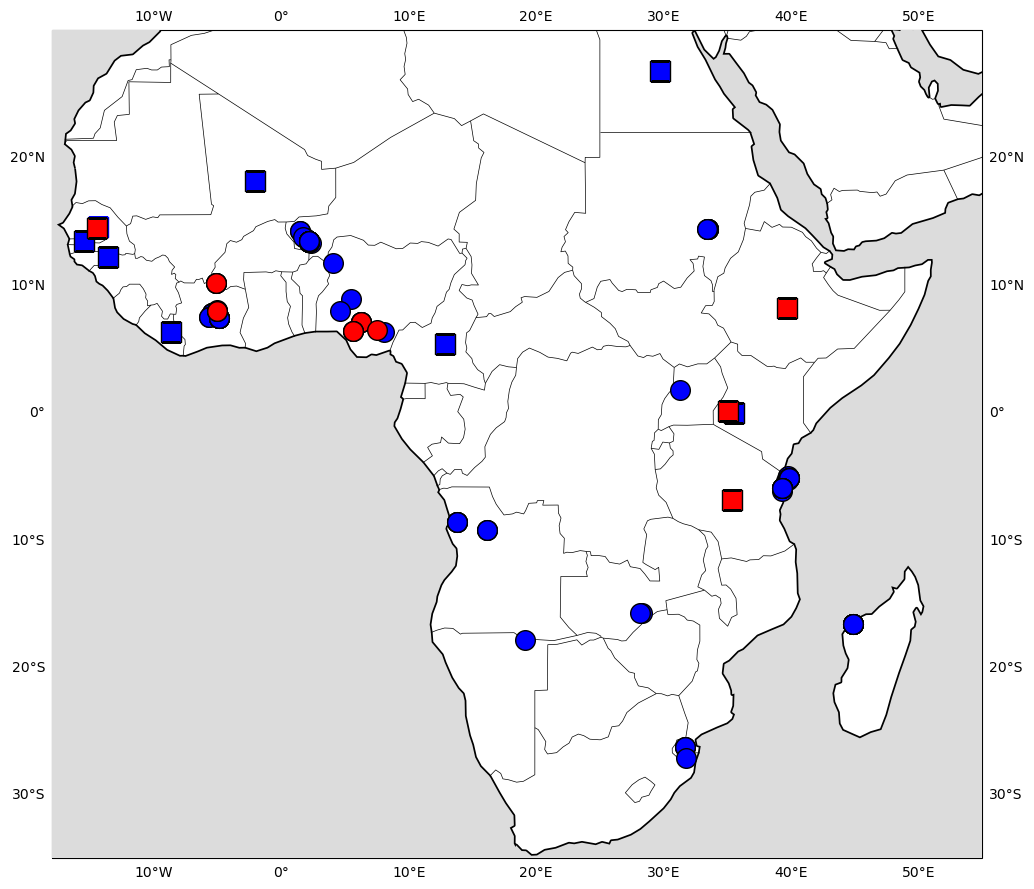

In [13]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(sh_df["lon"], sh_df["lat"], marker='o', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )


cameroon = [5.359846821839579, 12.83241583754397]
egypt = [26.79051859746806, 29.75135994720815]
gambia = [13.417174078240578, -15.468365084085413]
guineabissau = [12.217389596231383, -13.622661452252528]
kenya = [-0.0375919952015787, 35.50819643080273]
liberia = [6.3216131811123155, -8.65684105409062]
mali = [18.110125425188524, -2.108990737257369]
senegal = [14.525930151908192, -14.413677237868546]


plt.scatter(cameroon[1], cameroon[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )

plt.scatter(egypt[1], egypt[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )
plt.scatter(gambia[1], gambia[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )
plt.scatter(guineabissau[1], guineabissau[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )
plt.scatter(kenya[1], kenya[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )
plt.scatter(liberia[1], liberia[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )
plt.scatter(mali[1], mali[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )
plt.scatter(senegal[1], senegal[0], marker='s', s = 200, linewidth=1, color="blue"
         )


plt.scatter(sb_df["lon"], sb_df["lat"], marker='o', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )


ethiopia  = [8.196030504597621, 39.6830013610115]
kenya     = [0.09424373991248912, 35.02479861435154]
senegal   = [14.440832562834492, -14.50156852317904]
tanzania  = [-6.920119996988466, 35.332415709051126]
 
plt.scatter(ethiopia[1], ethiopia[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(kenya[1], kenya[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(senegal[1], senegal[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(tanzania[1], tanzania[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-18, 55])
plt.ylim([-35, 30])

# Save the plot by calling plt.savefig() BEFORE plt.show()
#plt.savefig('sh_and_sb_map.png', dpi=300)
#plt.savefig('sh_and_sb_map.svg')


plt.show()

In [17]:
df

,sample_name,lat,lon,pca_species,country
0,Sb_NG_au_1.2,7.067448,6.271139,s_bovis,nigeria
1,Sb_NG_au_2.10,7.067448,6.271139,s_bovis,nigeria
2,Sb_NG_au_2.13,7.067448,6.271139,s_bovis,nigeria
3,Sb_NG_au_2.5,7.067448,6.271139,s_bovis,nigeria
4,Sb_NG_au_2.6,7.067448,6.271139,s_bovis,nigeria
...,...,...,...,...,...
166,ssp_niger_libore_167,13.390080,2.197110,s_haematobium,niger
167,ssp_niger_libore_168,13.390080,2.197110,s_haematobium,niger
168,ssp_niger_libore_169,13.404170,2.188020,s_haematobium,niger
169,ssp_niger_libore_173,13.404170,2.188020,s_haematobium,niger


In [24]:
#set marker shapes based on PRESUMED species
markers = { 's_haematobium'  : "o", 
            's_sp'           : "v",
            's_bovis'        : "X",
            's_intercalatum' : "*", 
            's_guineensis'   : "P",
            's_margrebowiei' : "D", 
            's_matthei'      : "s",}

In [75]:
countries = df["country"].unique()

array(['nigeria', 'ethiopia', 'kenya', 'senegal', 'tanzania', 'na',
       'cote_d_ivoire', 'niger', 'uganda', 'cameroon', 'egypt', 'gambia',
       'guineabissau', 'mali', 'zanzibar', 'angola', 'liberia',
       'madagascar', 'namibia', 'sudan', 'swaziland', 'zambia'],
      dtype=object)

,sample_name,lat,lon,pca_species,country,marker,zorder
10,Sh_NG_ed_1_3,NaN,NaN,s_haematobium,nigeria,o,8
11,Sh_NG_ed_3_2,NaN,NaN,s_haematobium,nigeria,o,8
15,bovis_ethiopia_SRR13579874,NaN,NaN,s_bovis,ethiopia,X,17
16,bovis_keyna_SRR13579878,NaN,NaN,s_bovis,kenya,X,17
17,bovis_senegal_SRR13579876,NaN,NaN,s_bovis,senegal,X,17
18,bovis_tanzania_ERR103048,NaN,NaN,s_bovis,tanzania,X,17
19,bovis_tanzania_SRR7867225,NaN,NaN,s_bovis,tanzania,X,17
20,bovis_tanzania_SRR7867226,NaN,NaN,s_bovis,tanzania,X,17
42,sbo_uganda_apac13_35,NaN,NaN,s_bovis,uganda,X,17
44,sh_cameroon_SRR13579883,NaN,NaN,s_haematobium,cameroon,o,8


In [76]:
countries = df["country"].unique()

col_df=pd.read_csv(f"{proj_dir}/data/country_colors.csv", sep=",", header=0)
colors = col_df.set_index('country')['color'].to_dict()

for country in colors.keys():
    if country not in countries:
        del colors[country]

colors

{'angola': '#FF0000',
 'swaziland': '#FF1C00',
 'ethiopia': '#FF3800',
 'kenya': '#FF5500',
 'madagascar': '#FF7100',
 'namibia': '#FF8D00',
 'tanzania': '#FFAA00',
 'uganda': '#FFC600',
 'zambia': '#FFE200',
 'zanzibar': '#FFFF00',
 'cameroon': '#0000FF',
 'cote_d_ivoire': '#0019E5',
 'egypt': '#0033CC',
 'gambia': '#004CB2',
 'guineabissau': '#006699',
 'liberia': '#007F7F',
 'mali': '#009965',
 'niger': '#00B24C',
 'nigeria': '#00CC32',
 'senegal': '#00E519',
 'sudan': '#00FF00',
 'na': '#808080'}

In [70]:
cartopy_shading = {'Angola': '#FF0000',
 'Kingdom of eSwatini': '#FF1C00',
 'Ethiopia': '#FF3800',
 'Kenya': '#FF5500',
 'Madagascar': '#FF7100',
 'Namibia': '#FF8D00',
 'Tanzania': '#FFAA00',
 'Uganda': '#FFC600',
 'Zambia': '#FFE200',
 'Cameroon': '#0000FF',
 "Côte d'Ivoire": '#0019E5',
 'Egypt': '#0033CC',
 'The Gambia': '#004CB2',
 'Guinea-Bissau': '#006699',
 'Liberia': '#007F7F',
 'Mali': '#009965',
 'Niger': '#00B24C',
 'Nigeria': '#00CC32',
 'Senegal': '#00E519',
 'Sudan': '#00FF00'}

for country in shpreader.Reader(countries_shp).records():
    if country.attributes['NAME_LONG'] in cartopy_shading.keys():
        print(country.attributes['NAME_LONG'])

        

Tanzania
Kenya
Sudan
Namibia
Senegal
Mali
Niger
Nigeria
Cameroon
Côte d'Ivoire
Guinea-Bissau
Liberia
Zambia
Kingdom of eSwatini
Angola
Madagascar
The Gambia
Egypt
Ethiopia
Uganda


In [29]:
df["marker"]=[markers[species] for species in df["pca_species"]]

/tmp/ipykernel_232807/3675830354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marker"]=[markers[species] for species in df["pca_species"]]


In [33]:
zorder = { 's_haematobium'  : "8", 
            's_sp'           : "12",
            's_bovis'        : "17",
            's_intercalatum' : "12", 
            's_guineensis'   : "12",
            's_margrebowiei' : "12", 
            's_matthei'      : "12",}

In [34]:
df["zorder"]=[zorder[species] for species in df["pca_species"]]

/tmp/ipykernel_232807/1276624032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zorder"]=[zorder[species] for species in df["pca_species"]]


In [45]:
df.loc[~df["pca_species"].isin(["s_haematobium", "s_bovis"])]

,sample_name,lat,lon,pca_species,country,marker,zorder
21,guineensis_saotome_ERR119612,NaN,NaN,s_guineensis,na,P,12
22,intercalatum_drcongo_ERR119613,NaN,NaN,s_intercalatum,na,*,12
23,margrebowiei_zambia_ERR310940,NaN,NaN,s_margrebowiei,na,D,12
24,matthei_zambia_ERR103051,NaN,NaN,s_matthei,na,s,12


In [46]:
df.loc[df["sample_name"] == "guineensis_saotome_ERR119612", "lat"] = 0.330200
df.loc[df["sample_name"] == "guineensis_saotome_ERR119612", "lon"] = 6.733300
df.loc[df["sample_name"] == "intercalatum_drcongo_ERR119613", "lat"] = -4.303300
df.loc[df["sample_name"] == "intercalatum_drcongo_ERR119613", "lon"] = 15.310500
df.loc[df["sample_name"] == "margrebowiei_zambia_ERR310940", "lat"] = -15.387500
df.loc[df["sample_name"] == "margrebowiei_zambia_ERR310940", "lon"] = 28.322800
df.loc[df["sample_name"] == "matthei_zambia_ERR103051", "lat"] = -15.387500
df.loc[df["sample_name"] == "matthei_zambia_ERR103051", "lon"] = 28.322800

df.loc[~df["pca_species"].isin(["s_haematobium", "s_bovis"])]

,sample_name,lat,lon,pca_species,country,marker,zorder
21,guineensis_saotome_ERR119612,0.3302,6.7333,s_guineensis,na,P,12
22,intercalatum_drcongo_ERR119613,-4.3033,15.3105,s_intercalatum,na,*,12
23,margrebowiei_zambia_ERR310940,-15.3875,28.3228,s_margrebowiei,na,D,12
24,matthei_zambia_ERR103051,-15.3875,28.3228,s_matthei,na,s,12


In [113]:
df["alpha"] = 1

/tmp/ipykernel_232807/2899109015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha"] = 1


In [157]:
df.loc[df["alpha"] == "0.5"]

,sample_name,lat,lon,pca_species,country,marker,zorder,alpha


In [152]:
unk_sites = {
    "cameroon":      [ 3.844119,   11.501346],
    "cote_d_ivoire": [6.808011,    -5.279011],
    "egypt":         [30.033333,   31.233334],
    "ethiopia":      [ 0.005401,   38.763611],
    "gambia":        [13.454400,  -16.575300],
    "guineabissau":  [11.863200,  -15.584300],
    "kenya":         [-1.292100,   36.821900],
    "liberia":       [ 6.300774,  -10.797160],
    "mali":          [12.631719,   -7.997178],
    "nigeria":       [ 9.075947,    7.405385],
    "senegal":       [14.716677,  -17.467686],
    "swaziland":     [-26.308876,  31.137979],
    "tanzania":      [-6.776012,   39.178326],
    "uganda":        [ 0.306777,   32.579755],
    "zanzibar":      [-6.168197,   39.193368]}


for index, row in df.loc[~np.isfinite(df["lon"])].iterrows():
    country=row["country"]
    sample=row["sample_name"]
    lat = unk_sites[country][0]
    lon = unk_sites[country][1]
    
    df.loc[df["sample_name"] == sample, "lat"] = lat
    df.loc[df["sample_name"] == sample, "lon"] = lon
    df.loc[df["sample_name"] == sample, "alpha"] = 0.5


(-35.0, 38.0)

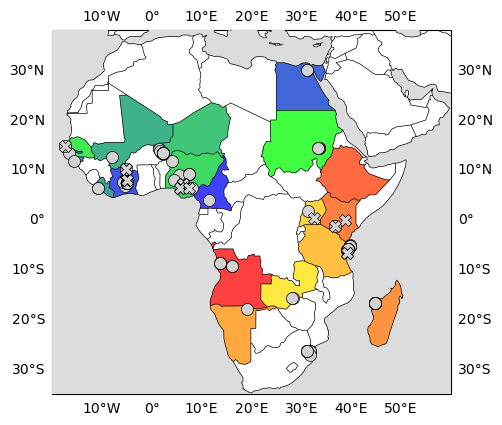

In [162]:
cm = 1/2.54 

#plot the results
#fig, ax = plt.subplots()
figure(figsize=(17*cm, 12*cm))

ax = plt.axes(projection=ccrs.PlateCarree())
m=[markers[species] for species in df["pca_species"]]


for index, row in df.iterrows():
    if row["pca_species"] in ["s_haematobium", "s_bovis"]:
        plt.scatter(row["lon"], row["lat"], marker=row["marker"], s = 75, linewidth=0.5, edgecolor="black",
             transform=ccrs.Geodetic(), alpha=1, zorder=int(row["zorder"]), color="lightgrey"
             )

                         

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=1)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)

# Get the cartopy shapefile reader for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

# Loop through countries and color Niger
for country in shpreader.Reader(countries_shp).records():
    if country.attributes['NAME_LONG'] in cartopy_shading.keys():
        ax.add_geometries([country.geometry], ccrs.PlateCarree(), facecolor=cartopy_shading[country.attributes['NAME_LONG']], alpha=0.75)


plt.xlim([-20, 60])
plt.ylim([-35, 38])

# Save the plot by calling plt.savefig() BEFORE plt.show()
#plt.savefig('sample_map.png')
#plt.savefig('sample_map.svg')


#Image(filename="sample_map.png")

In [63]:
import cartopy.io.shapereader as shpreader

In [ ]:
#merge sample sheets:

In [5]:
Path("{}/merge_sample_sheets".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/merge_sample_sheets".format(results_dir))

In [6]:
!ls

all.csv  plate.csv  sh_samplekey-19047-14_2020-08-04.csv


In [12]:
# Load the CSV files into dataframes
all_df = pd.read_csv('all.csv', sep=",", header=0)
plate_df = pd.read_csv('plate.csv', sep=",", header=0)

In [29]:
all_df

,REC,AK_IRN,parent_rec,digitise,condition,preservative,storage,sample_type,sample_origin,host,...,CERC_ID_if_known,H20_no,notes,PLATE,Position,plate_rec,punching_notes,current_tot,roy_tot,roy_note
0,9211,8107347.0,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,human,...,NaN,6.0,NaN,plate 1,A1,1,NaN,82,4,NaN
1,9212,8107347.0,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,human,...,NaN,6.0,NaN,plate 1,B1,2,NaN,73,4,NaN
2,9213,8107347.0,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,human,...,NaN,6.0,NaN,plate 1,C1,3,NaN,72,4,NaN
3,9214,8107347.0,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,human,...,NaN,6.0,NaN,plate 1,D1,4,NaN,48,4,NaN
4,9215,8107347.0,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,human,...,NaN,6.0,NaN,plate 1,E1,5,NaN,57,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,12128,NaN,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,NaN,...,NaN,NaN,NaN,plate 2,D12,188,NaN,17,3,NaN
187,12130,NaN,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,NaN,...,NaN,NaN,NaN,plate 2,E12,189,NaN,68,3,NaN
188,12131,NaN,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,NaN,...,NaN,NaN,NaN,plate 2,F12,190,NaN,57,3,NaN
189,12132,NaN,NaN,NaN,NaN,NaN,FTA card,miracidia,urine,NaN,...,NaN,NaN,NaN,plate 2,G12,191,NaN,69,3,NaN


In [14]:
plate_df

,REC,plate_rec,Rack Barcode,barcode_label_ID,country,site_name,ID,sp_cleaned,tot_punches,coord,Barcode
0,9211,1.0,Roy_plate1,MCFEDA1E10392,Zanzibar: Pemba,Uwandani school,11012,S. haematobium,4.0,A01,0109507583
1,9212,2.0,Roy_plate1,MCFEDA1E10393,Zanzibar: Pemba,Uwandani school,11038,S. haematobium,4.0,B01,0109507560
2,9213,3.0,Roy_plate1,MCFEDA1E10394,Zanzibar: Pemba,Uwandani school,11081,S. haematobium,4.0,C01,0109507559
3,9214,4.0,Roy_plate1,MCFEDA1E10395,Zanzibar: Pemba,Uwandani school,11310,S. haematobium,4.0,D01,0109507536
4,9215,5.0,Roy_plate1,MCFEDA1E10396,Zanzibar: Pemba,Uwandani school,11334,S. haematobium,4.0,E01,0109507535
...,...,...,...,...,...,...,...,...,...,...,...
186,12126,187.0,roy_plate2,MCF0F300C0361,Swaziland,NaN,ND-03,S. haematobium,3.0,C012,0109492988
187,12128,188.0,roy_plate2,MCF0F300C0362,Swaziland,Njojane Primary school,NJ-40,S. haematobium,3.0,D012,0145487781
188,12130,189.0,roy_plate2,MCF0F300C0364,Swaziland,Njojane Primary school,NJ-06,S. haematobium,3.0,E012,0145487761
189,12131,190.0,roy_plate2,MCF0F300C0365,Swaziland,Njojane Primary school,NJ-42,S. haematobium,3.0,F012,0145487399


In [41]:
# Find duplicated barcodes in both dataframes
duplicated_barcodes_all = all_df[all_df['REC'].duplicated(keep=False)]['REC'].unique()
duplicated_barcodes_plate = plate_df[plate_df['REC'].duplicated(keep=False)]['REC'].unique()

In [42]:
duplicated_barcodes_plate

array([], dtype=int64)

In [43]:
duplicated_barcodes_all

array([], dtype=int64)

In [47]:
# Combine the duplicated barcodes from both dataframes
all_duplicated_barcodes = pd.concat([pd.Series(duplicated_barcodes_all), pd.Series(duplicated_barcodes_plate)]).unique()
all_duplicated_barcodes

array([], dtype=int64)

In [48]:
uniq_all_df = all_df.drop_duplicates(subset='REC', keep=False)
uniq_plate_df = plate_df.drop_duplicates(subset='REC', keep=False)

In [49]:
# Now merge on 'barcode'
merged_df = pd.merge(uniq_plate_df, uniq_all_df, on='REC', how='inner')

merged_df.to_csv("uniq_merged_r1.csv", sep=",", header=True, index=False)

In [52]:
merged_df.columns

Index(['REC', 'plate_rec_x', 'Rack Barcode', 'barcode_label_ID_x', 'country_x',
       'site_name_x', 'ID_x', 'sp_cleaned_x', 'tot_punches', 'coord',
       'Barcode', 'AK_IRN', 'parent_rec', 'digitise', 'condition',
       'preservative', 'storage', 'sample_type', 'sample_origin', 'host',
       'project', 'date_received', 'barcode_label_ID_y', 'photo_ID',
       'EMU_cat_irn', 'country_y', 'site_name_y', 'site_irn', 'coll_date',
       'coll_date2', 'time_coll', 'collector', 'collector2', 'coll_method',
       'ID_y', 'infection_status', 'shed_sp', 'sp_cleaned_y',
       'species_verbatim', 'sp_post_bc', 'species_notes', 'sample_no',
       'sample_gone', 'subsample', 'CERC_ID_if_known', 'H20_no', 'notes',
       'PLATE', 'Position', 'plate_rec_y', 'punching_notes', 'current_tot',
       'roy_tot', 'roy_note'],
      dtype='object')

In [50]:
id_df = pd.read_csv('sh_samplekey-19047-14.csv', sep=",", header=0)
id_df

,admera_health_library_id,custom_library_id,analytic_id
0,19047FL-14-01-01,1,sha_pemba_uwandani_1
1,19047FL-14-01-02,2,sha_pemba_uwandani_2
2,19047FL-14-01-03,3,sha_pemba_uwandani_3
3,19047FL-14-01-04,7,sha_pemba_uwandani_7
4,19047FL-14-01-05,10,sha_pemba_uwandani_10
...,...,...,...
151,19047FL-14-04-36,187,sha_swaz_unk_187
152,19047FL-14-04-37,188,sha_swaz_njojane_188
153,19047FL-14-04-38,189,sha_swaz_njojane_189
154,19047FL-14-04-39,190,sha_swaz_njojane_190


In [39]:
merged_df = pd.merge(merged_df, id_df, on='REC', how='inner')


In [54]:
result_df = pd.merge(id_df, merged_df, left_on='custom_library_id', right_on='plate_rec_x', how='outer')
result_df

,admera_health_library_id,custom_library_id,analytic_id,REC,plate_rec_x,Rack Barcode,barcode_label_ID_x,country_x,site_name_x,ID_x,...,CERC_ID_if_known,H20_no,notes,PLATE,Position,plate_rec_y,punching_notes,current_tot,roy_tot,roy_note
0,19047FL-14-01-01,1.0,sha_pemba_uwandani_1,9211,1.0,Roy_plate1,MCFEDA1E10392,Zanzibar: Pemba,Uwandani school,11012,...,NaN,6.0,NaN,plate 1,A1,1,NaN,82,4,NaN
1,19047FL-14-01-02,2.0,sha_pemba_uwandani_2,9212,2.0,Roy_plate1,MCFEDA1E10393,Zanzibar: Pemba,Uwandani school,11038,...,NaN,6.0,NaN,plate 1,B1,2,NaN,73,4,NaN
2,19047FL-14-01-03,3.0,sha_pemba_uwandani_3,9213,3.0,Roy_plate1,MCFEDA1E10394,Zanzibar: Pemba,Uwandani school,11081,...,NaN,6.0,NaN,plate 1,C1,3,NaN,72,4,NaN
3,19047FL-14-01-04,7.0,sha_pemba_uwandani_7,4857,7.0,Roy_plate1,MCF44BBA20039,Zanzibar: Pemba,Uwandani school,11023,...,NaN,NaN,NaN,plate 1,G1,7,NaN,29,4,NaN
4,19047FL-14-01-05,10.0,sha_pemba_uwandani_10,6203,10.0,Roy_plate1,MCF900C190053,Zanzibar: Pemba,Uwandani school,11116,...,NaN,NaN,NaN,plate 1,B2,10,NaN,43,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,NaN,NaN,NaN,886,152.0,roy_plate2,MCF03050E0948,Niger,Libore 9 canal secondaire,L361,...,NaN,NaN,B. truncatus no. 1 written on card,plate 2,H7,152,NaN,59,3,NaN
187,NaN,NaN,NaN,887,153.0,roy_plate2,MCF03050E0949,Niger,Libore 5 canal tertiaire,L358,...,NaN,NaN,B. truncatus no. 6 written on card,plate 2,A8,153,NaN,52,3,NaN
188,NaN,NaN,NaN,973,158.0,roy_plate2,MCF04F9A00295,Niger,Libore 3 canal tertiaire,L439,...,NaN,6.0,non indicating cards B truncatus no. 1 writte...,plate 2,F8,158,NaN,54,3,NaN
189,NaN,NaN,NaN,818,174.0,roy_plate2,MCFE660C20064,Niger,Libore 8 canal secondaire,L33,...,NaN,13.0,B. truncatus no. 5 written on card,plate 2,F10,174,NaN,56,3,NaN


In [55]:
result_df.to_csv("merged.csv", sep=",", header=True, index=False)

In [69]:
result_df = pd.read_csv('merged.csv', sep=",", header=0)
result_df

,admera_health_library_id,custom_library_id_AARYA,analytic_id,REC,plate_rec,Rack Barcode,barcode_label_ID,country,site_name,ID,...,subsample,CERC_ID_if_known,H20_no,notes,PLATE,Position,punching_notes,current_tot,roy_tot,roy_note
0,19047FL-14-01-01,1.0,sha_pemba_uwandani_1,9211,1.0,Roy_plate1,MCFEDA1E10392,Zanzibar: Pemba,Uwandani school,11012,...,NaN,NaN,6.0,NaN,plate 1,A1,NaN,82,4,NaN
1,19047FL-14-01-02,2.0,sha_pemba_uwandani_2,9212,2.0,Roy_plate1,MCFEDA1E10393,Zanzibar: Pemba,Uwandani school,11038,...,NaN,NaN,6.0,NaN,plate 1,B1,NaN,73,4,NaN
2,19047FL-14-01-03,3.0,sha_pemba_uwandani_3,9213,3.0,Roy_plate1,MCFEDA1E10394,Zanzibar: Pemba,Uwandani school,11081,...,NaN,NaN,6.0,NaN,plate 1,C1,NaN,72,4,NaN
3,19047FL-14-01-04,7.0,sha_pemba_uwandani_7,4857,7.0,Roy_plate1,MCF44BBA20039,Zanzibar: Pemba,Uwandani school,11023,...,NaN,NaN,NaN,NaN,plate 1,G1,NaN,29,4,NaN
4,19047FL-14-01-05,10.0,sha_pemba_uwandani_10,6203,10.0,Roy_plate1,MCF900C190053,Zanzibar: Pemba,Uwandani school,11116,...,NaN,NaN,NaN,NaN,plate 1,B2,NaN,43,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,NaN,NaN,NaN,886,152.0,roy_plate2,MCF03050E0948,Niger,Libore 9 canal secondaire,L361,...,NaN,NaN,NaN,B. truncatus no. 1 written on card,plate 2,H7,NaN,59,3,NaN
187,NaN,NaN,NaN,887,153.0,roy_plate2,MCF03050E0949,Niger,Libore 5 canal tertiaire,L358,...,NaN,NaN,NaN,B. truncatus no. 6 written on card,plate 2,A8,NaN,52,3,NaN
188,NaN,NaN,NaN,973,158.0,roy_plate2,MCF04F9A00295,Niger,Libore 3 canal tertiaire,L439,...,NaN,NaN,6.0,non indicating cards B truncatus no. 1 writte...,plate 2,F8,NaN,54,3,NaN
189,NaN,NaN,NaN,818,174.0,roy_plate2,MCFE660C20064,Niger,Libore 8 canal secondaire,L33,...,NaN,NaN,13.0,B. truncatus no. 5 written on card,plate 2,F10,NaN,56,3,NaN


In [70]:
cleaned_df = result_df.dropna(axis=1, how='all')
cleaned_df

,admera_health_library_id,custom_library_id_AARYA,analytic_id,REC,plate_rec,Rack Barcode,barcode_label_ID,country,site_name,ID,...,sample_no,sample_gone,H20_no,notes,PLATE,Position,punching_notes,current_tot,roy_tot,roy_note
0,19047FL-14-01-01,1.0,sha_pemba_uwandani_1,9211,1.0,Roy_plate1,MCFEDA1E10392,Zanzibar: Pemba,Uwandani school,11012,...,86,NaN,6.0,NaN,plate 1,A1,NaN,82,4,NaN
1,19047FL-14-01-02,2.0,sha_pemba_uwandani_2,9212,2.0,Roy_plate1,MCFEDA1E10393,Zanzibar: Pemba,Uwandani school,11038,...,77,NaN,6.0,NaN,plate 1,B1,NaN,73,4,NaN
2,19047FL-14-01-03,3.0,sha_pemba_uwandani_3,9213,3.0,Roy_plate1,MCFEDA1E10394,Zanzibar: Pemba,Uwandani school,11081,...,76,NaN,6.0,NaN,plate 1,C1,NaN,72,4,NaN
3,19047FL-14-01-04,7.0,sha_pemba_uwandani_7,4857,7.0,Roy_plate1,MCF44BBA20039,Zanzibar: Pemba,Uwandani school,11023,...,63,30.0,NaN,NaN,plate 1,G1,NaN,29,4,NaN
4,19047FL-14-01-05,10.0,sha_pemba_uwandani_10,6203,10.0,Roy_plate1,MCF900C190053,Zanzibar: Pemba,Uwandani school,11116,...,71,24.0,NaN,NaN,plate 1,B2,NaN,43,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,NaN,NaN,NaN,886,152.0,roy_plate2,MCF03050E0948,Niger,Libore 9 canal secondaire,L361,...,66,4.0,NaN,B. truncatus no. 1 written on card,plate 2,H7,NaN,59,3,NaN
187,NaN,NaN,NaN,887,153.0,roy_plate2,MCF03050E0949,Niger,Libore 5 canal tertiaire,L358,...,64,9.0,NaN,B. truncatus no. 6 written on card,plate 2,A8,NaN,52,3,NaN
188,NaN,NaN,NaN,973,158.0,roy_plate2,MCF04F9A00295,Niger,Libore 3 canal tertiaire,L439,...,57,NaN,6.0,non indicating cards B truncatus no. 1 writte...,plate 2,F8,NaN,54,3,NaN
189,NaN,NaN,NaN,818,174.0,roy_plate2,MCFE660C20064,Niger,Libore 8 canal secondaire,L33,...,63,4.0,13.0,B. truncatus no. 5 written on card,plate 2,F10,NaN,56,3,NaN


In [71]:
equal_columns_pairs = []

# Compare pairs of columns
for col1 in cleaned_df.columns:
    for col2 in cleaned_df.columns:
        if col1 != col2 and cleaned_df[col1].equals(cleaned_df[col2]):
            # Store the pair in a tuple (sort to avoid duplicate pairs)
            pair = tuple(sorted([col1, col2]))
            if pair not in equal_columns_pairs:
                equal_columns_pairs.append(pair)

# Print pairs of columns that have the same values
for col1, col2 in equal_columns_pairs:
    print(f"Columns '{col1}' and '{col2}' have identical values.")


In [72]:
cleaned_df.to_csv('all_scan_info_merged.csv', index=False, na_rep='NaN', header=True)